# Name : Ickbum Kim
# RIN : 662045346

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier



In [49]:
wine_data = load_wine()
X = wine_data.data
s = StandardScaler()
X_new = s.fit_transform(X)
model = PCA(n_components=2)
X_pca = model.fit_transform(X_new)
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = wine_data.target
explained_variance_ratio = pca.explained_variance_ratio_
print("Principal Component 1:", explained_variance_ratio[0])
print("Principal Component 2:", explained_variance_ratio[1])

Principal Component 1: 0.36198848099926323
Principal Component 2: 0.1920749025700898


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, wine_data.target, test_size=0.4, random_state=123)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [51]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(wine_data.data, wine_data.target, test_size=0.4, random_state=42)
X_train_standardized =s.transform(X_train_original)
X_test_standardized = s.transform(X_test_original)
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=123)
dt_classifier.fit(X_train_standardized, y_train_original)
y_pred_dt = dt_classifier.predict(X_test_standardized)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score for SVM:", accuracy_score(y_test, y_pred))
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test_original, y_pred_dt))
print("Accuracy Score for Decision Tree Classifier:", accuracy_score(y_test_original, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.92      0.92      0.92        24
           2       1.00      0.92      0.96        24

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72

Accuracy Score for SVM: 0.9444444444444444

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.84      1.00      0.92        27
           2       1.00      0.95      0.97        19

    accuracy                           0.93        72
   macro avg       0.95      0.93      0.93        72
weighted avg       0.94      0.93      0.93        72

Accuracy Score for Decision Tree Classifier: 0.9305555555555556


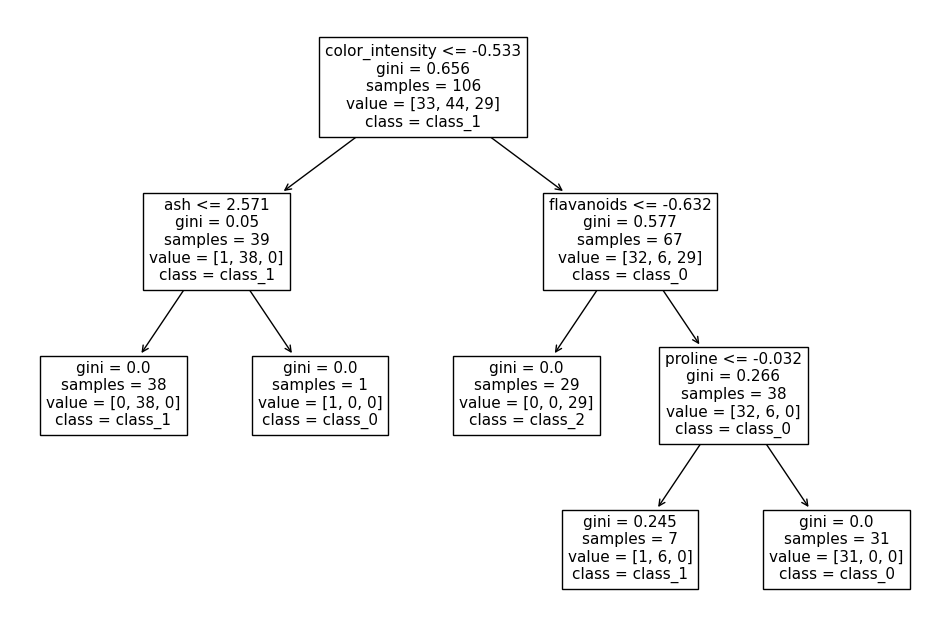

In [52]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=wine_data.feature_names, class_names=wine_data.target_names)
plt.show()